# Trabajo final - Maestría en profundización
## Lesty Yoladi Delgado Palacios - 1017214424

## Importa librerias

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import spacy
from xgboost import XGBClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

##
from mpl_toolkits.mplot3d import Axes3D


## Lectura de datos

In [402]:
data2=pd.read_csv('../datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
data2.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [403]:
data3=pd.read_csv('../datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data3.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...


In [404]:
data1=pd.read_csv('../datasets/1429_1.csv.zip')
data1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


## Transformar variables en float

In [405]:
data2['reviews.rating']=data2['reviews.rating'].astype(float)

In [406]:
data2.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3.0,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4.0,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


## Cantidad total de puntuaciones para cada valor de ranking


In [407]:
data2['reviews.rating'].value_counts()

5.0    19897
4.0     5648
3.0     1206
1.0      965
2.0      616
Name: reviews.rating, dtype: int64

In [408]:
data3['reviews.rating']=data3['reviews.rating'].astype(float)

In [409]:
data3['reviews.rating'].value_counts()

5.0    3478
4.0    1208
3.0     197
1.0      63
2.0      54
Name: reviews.rating, dtype: int64

In [410]:
val_neg_data2=data2[data2['reviews.rating'].isin([1.0,2.0,3.0])]
len(val_neg_data2)

2787

In [411]:
val_neg_data3=data3[data3['reviews.rating'].isin([1.0,2.0,3.0])]

In [412]:
val_neg_data1=data1[data1['reviews.rating'].isin([1.0,2.0,3.0])]

In [413]:
val_pos_general=data1[data1['reviews.rating'].isin([5.0])][:7000]

In [414]:
val_cuatr_general=data1[data1['reviews.rating'].isin([4.0])][:5000]

In [415]:
val_neg_data2_f=val_neg_data2[['reviews.rating','reviews.text']]

In [416]:
val_neg_data3_f=val_neg_data3[['reviews.rating','reviews.text']]

In [417]:
val_neg_data1_f=val_neg_data1[['reviews.rating','reviews.text']]

In [418]:
val_pos_general_f=val_pos_general[['reviews.rating','reviews.text']]

In [419]:
val_cuatr_general_f=val_cuatr_general[['reviews.rating','reviews.text']]

In [420]:
val_pos_general_f.head(2)

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...


In [421]:
df1=val_neg_data1_f[['reviews.rating','reviews.text']]
df2=val_neg_data2_f[['reviews.rating','reviews.text']]
df3=val_neg_data3_f[['reviews.rating','reviews.text']]
df4=val_pos_general_f[['reviews.rating','reviews.text']]
df5=val_cuatr_general_f[['reviews.rating','reviews.text']]


In [422]:
n_filas, n_col=df1.shape
print(f'La cantidad de filas de los de valores negativos del data1 es : {n_filas} , el número de columnas es: {n_col}')


La cantidad de filas de los de valores negativos del data1 es : 2311 , el número de columnas es: 2


In [423]:

n_filas_2, n_col_2=df2.shape
print(f'La cantidad de filas de los de valores negativos del data2 es : {n_filas_2} , el número de columnas es: {n_col_2}')

La cantidad de filas de los de valores negativos del data2 es : 2787 , el número de columnas es: 2


In [424]:

n_filas_3, n_col_3=df3.shape
print(f'La cantidad de filas de los de valores negativos del data3 es : {n_filas_3} , el número de columnas es: {n_col_3}')

La cantidad de filas de los de valores negativos del data3 es : 314 , el número de columnas es: 2


In [426]:

n_filas_4, n_col_4=df4.shape
print(f'La cantidad de filas de los de valores positivos del data4 es : {n_filas_4} , el número de columnas es: {n_col_4}')

La cantidad de filas de los de valores positivos del data4 es : 7000 , el número de columnas es: 2


In [427]:
n_filas_5, n_col_5=df5.shape
print(f'La cantidad de filas de los de valores neutros del data1 es : {n_filas_5} , el número de columnas es: {n_col_5}')


La cantidad de filas de los de valores neutros del data1 es : 5000 , el número de columnas es: 2


## Se concatenan los datasets

In [349]:
df=pd.concat([df1,df2,df3,df4,df5])

## Cantidad total de puntuaciones para cada valor de ranking

In [350]:
df['reviews.rating'].value_counts()

5.0    7000
4.0    5000
3.0    2902
1.0    1438
2.0    1072
Name: reviews.rating, dtype: int64

In [428]:
nrow, ncol=df.shape
print(f'el df 1 contiene {nrow} filas y {ncol} columnas')

el df 1 contiene 17411 filas y 5 columnas


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17411 entries, 0 to 17410
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           17411 non-null  int64  
 1   reviews.rating  17411 non-null  float64
 2   reviews.text    17411 non-null  object 
 3   sentiment       17411 non-null  int64  
 4   text            17411 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 680.2+ KB


In [430]:
df.dropna(inplace=True)

In [431]:
df.isnull().sum()

index             0
reviews.rating    0
reviews.text      0
sentiment         0
text              0
dtype: int64

In [432]:
df['reviews.rating'].value_counts()

5.0    6999
4.0    5000
3.0    2902
1.0    1438
2.0    1072
Name: reviews.rating, dtype: int64

## Distribución de cada una de las categorías 

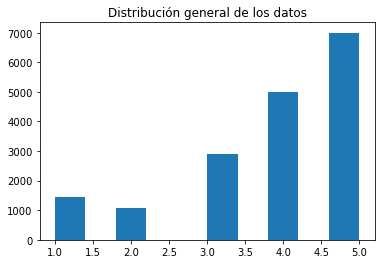

In [433]:
plt.hist(df[df['reviews.rating'].isin([5.0,4.0,3.0,2.0,1.0])]['reviews.rating'])
plt.title('Distribución general de los datos')
plt.show()

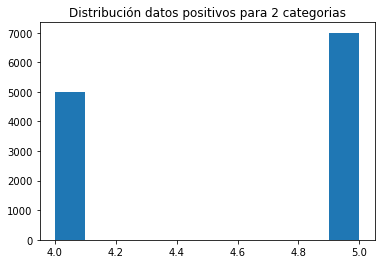

In [434]:
plt.hist(df[df['reviews.rating'].isin([4.0,5.0])]['reviews.rating'])
plt.title('Distribución datos positivos para 2 categorias')
plt.show()

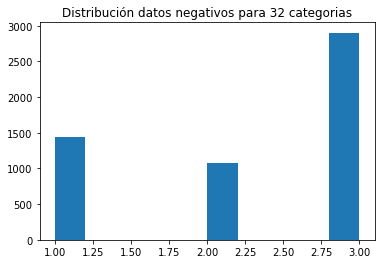

In [435]:
plt.hist(df[df['reviews.rating'].isin([1.0,2.0,3.0])]['reviews.rating'])
plt.title('Distribución datos negativos para 32 categorias')
plt.show()

In [356]:
print('El nombre de las columnas del conjunto de datos es: \n ', df.columns.values.tolist())

El nombre de las columnas del conjunto de datos es: 
  ['reviews.rating', 'reviews.text']


## DEFINICIÓN DE CATEGORIAS DE SENTIMIENTOS

##### Positivos = 5.0 y 4.0

##### Negativos = 1.0, 2.0 y 3.0

In [357]:
sentiment = {1.0: 0,
            2.0: 0,
            3.0: 0,
            4.0: 1,
            5.0: 1}
df['sentiment']=df['reviews.rating'].map(sentiment)

In [358]:
df['sentiment'].value_counts()

1    11999
0     5412
Name: sentiment, dtype: int64

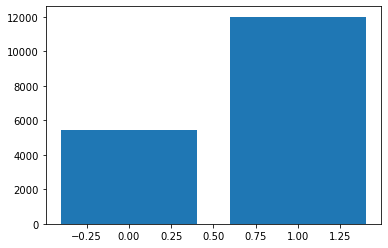

In [359]:
counts=df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [360]:
(df[df['reviews.rating']==4]['reviews.text']).head(3)

3     I've had my Fire HD 8 two weeks now and I love...
6     Great for e-reading on the go, nice and light ...
10    Not easy for elderly users cease of ads that p...
Name: reviews.text, dtype: object

## Selección de palabras mas usadas

In [361]:
words = pd.Series(' '.join(df['reviews.text']).split())

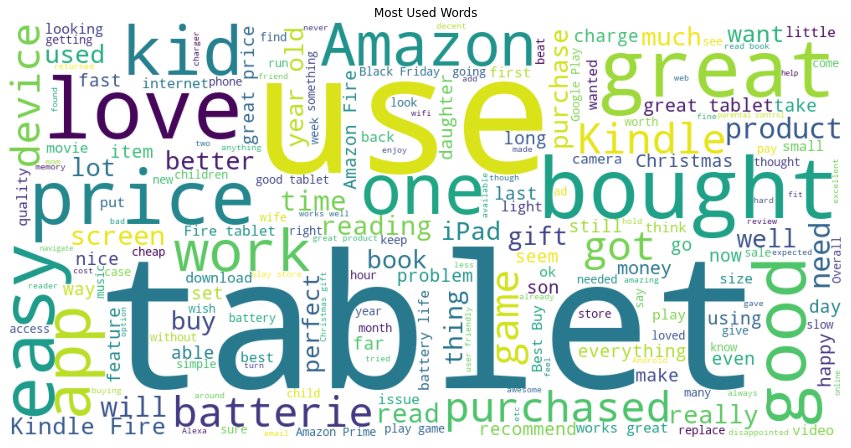

In [362]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Palabras mas usadas")
plt.axis("off")
plt.show()

## Selección de palabras positivas mas usadas

In [436]:
positiveWords=words = pd.Series(' '.join(df[df['sentiment']==1]['reviews.text']).split())

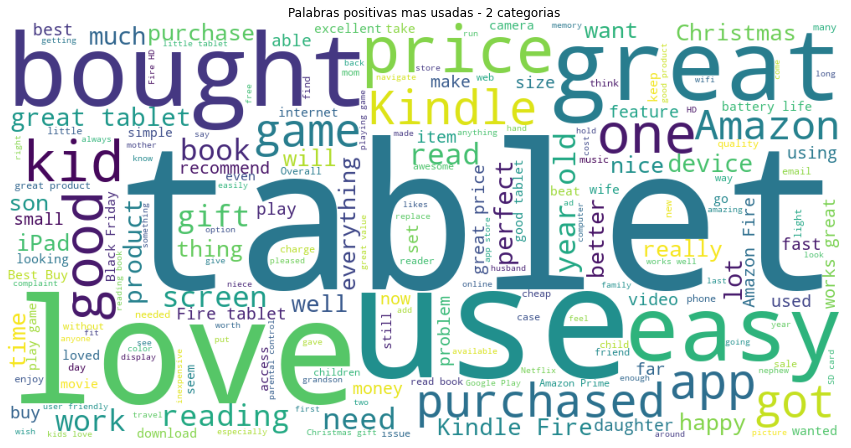

In [437]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(' '.join(positiveWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Palabras positivas mas usadas - 2 categorias ")
plt.axis("off")
plt.show()

## Selección de palabras negativos mas usadas

In [438]:
negativeWords=words = pd.Series(' '.join(df[df['sentiment']==0]['reviews.text']).split())

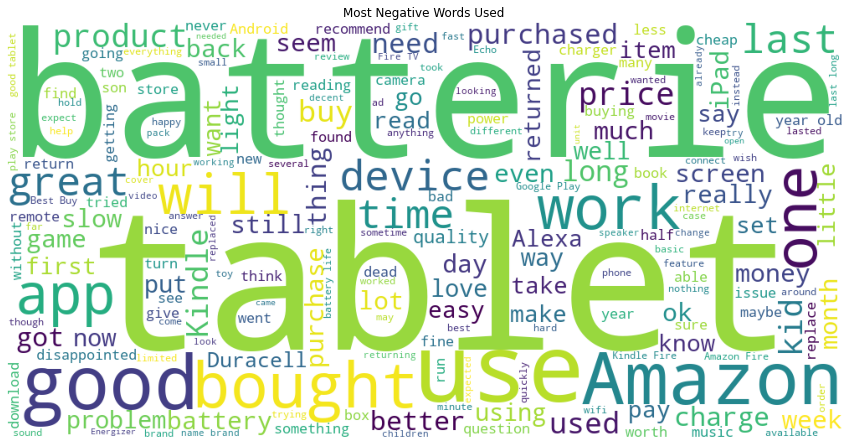

In [366]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(' '.join(negativeWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Palabras negativas mas usadas - 2 categorias ")
plt.axis("off")
plt.show()

## función que elimina caracteres especiales,  puntos, comas, etc


In [439]:
def cleanString(text):
    text = text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text
cleanString('great for beginner or experienced person. Bought as a gift and she loves it.')

'great for beginner or experienced person bought as a gift and she loves it '

In [368]:
#import nltk

#nltk.download()

#showing info http://nltk.github.com/nltk_data/


## Selección de StopWord

In [369]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]

l =["n'",'nor','no','not']
for i in stopword_list:
    if not any(word in i for word in l):
        suitable_stopwords.append(i)
print(stopword_list)
print(suitable_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [370]:
suitable_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
                    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only',
                    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've",
                    'd', 'll', 'ma', 'm', 'o', 're', 've', 'y']

In [371]:
replace_list=['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

## Función de eliminación de StopWords

In [372]:
def remove_stopwords(stmt):
    filtered_sentence = []
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append('not')
    return " ".join(filtered_sentence)
remove_stopwords('this product so far has not disappointed my children love to use it and i like the ability to monitor control what content they see with ease ')

'product far not disappointed children love use like ability monitor control content see ease'

## Lematización

In [373]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize(text):
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)
    
lemmatize('product far not disappointed children love use like ability monitor control content see ease')

'product far not disappointed child love use like ability monitor control content see ease'

## Limpieza, Lematización y eliminación de stopWords

In [374]:
df['text']=df['reviews.text'].apply(cleanString)

In [375]:
df['text']=df['text'].apply(remove_stopwords)

In [376]:
df['text']=df['text'].apply(lemmatize)

In [377]:
df['reviews.text'].iloc[0]

"Didn't have some of the features I was looking for. Returned it the next day. May be good for others"

In [378]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(df['text'])
features = vectorizer.transform(df['text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14274783],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40648469,
        0.        ]])

In [379]:
df = df.reset_index()

In [380]:
df = df.reset_index(drop=True)


In [381]:
df.iloc[0]

index                                                           117
reviews.rating                                                  2.0
reviews.text      Didn't have some of the features I was looking...
sentiment                                                         0
text               not feature look return next day may good others
Name: 0, dtype: object

In [382]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

In [383]:
tf_idf.head()

,aa,aaa,ability,able,absolutely,access,account,actually,ad,add,...,worry,worth,would,wrong,year,yes,yet,young,youtube,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.062414,0.0,0.000000,0.120212,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346983,0.0,...,0.0,0.0,0.226758,0.0,0.239784,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## división del conjunto de datos


In [385]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['sentiment'], test_size=0.2, random_state=42)

In [386]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(13928, 700)
Test Set Shape		:(3483, 700)


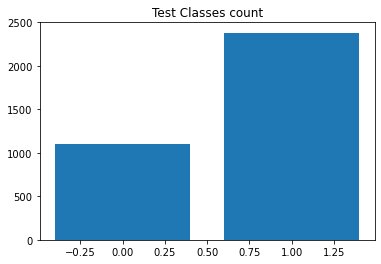

In [387]:
counts=y_test.value_counts()
plt.title("Test Classes count")
plt.bar(counts.index, counts.values)
plt.show()

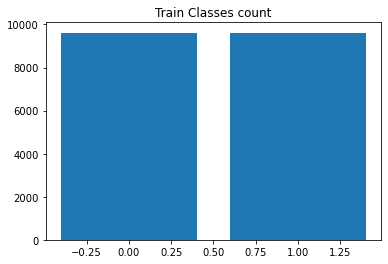

In [441]:
counts=y_train.value_counts()
plt.title("Train Classes count")
plt.bar(counts.index, counts.values)
plt.show()

In [442]:
yy=pd.DataFrame(y_train)

In [443]:
train_data = pd.concat([X_train,yy],axis=1)

In [444]:
train_data.head()

,aa,aaa,ability,able,absolutely,access,account,actually,ad,add,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
2753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [445]:
target_count = train_data['sentiment'].value_counts()
negative_class = train_data[train_data['sentiment'] == 0]
positive_class = train_data[train_data['sentiment'] == 1]
negative_over = negative_class.sample(target_count[1], replace=True)
df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,aa,aaa,ability,able,absolutely,access,account,actually,ad,add,...,worth,would,wrong,year,yes,yet,young,youtube,yr,sentiment
13613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1
4084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0
11872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.268958,0.0,0.000000,0.0,0.0,1
7552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1
4091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.114758,0.0,0.0,0.000000,0.0,0.180969,0.0,0.0,0


In [446]:
df_train_over['sentiment'].value_counts()

0    9618
1    9618
Name: sentiment, dtype: int64

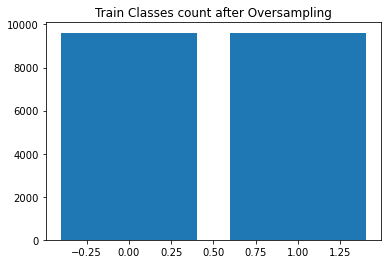

In [447]:
counts=df_train_over['sentiment'].value_counts()
plt.title("Train Classes count after Oversampling")
plt.bar(counts.index, counts.values)
plt.show()

In [448]:
X_train=df_train_over.iloc[:,:-1]
y_train=df_train_over['sentiment']

In [449]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='YlGnBu').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1102
           1       0.90      0.87      0.88      2381

    accuracy                           0.84      3483
   macro avg       0.81      0.83      0.82      3483
weighted avg       0.85      0.84      0.84      3483

AUC  0.8277819107864667


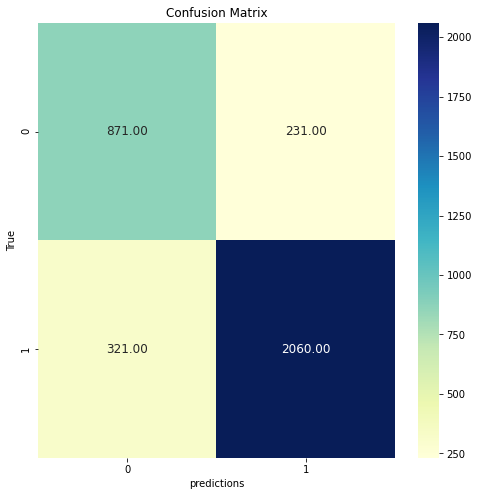

In [450]:
modeling(MultinomialNB())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1102
           1       0.93      0.90      0.91      2381

    accuracy                           0.88      3483
   macro avg       0.86      0.87      0.87      3483
weighted avg       0.89      0.88      0.88      3483

AUC  0.8726447884835408


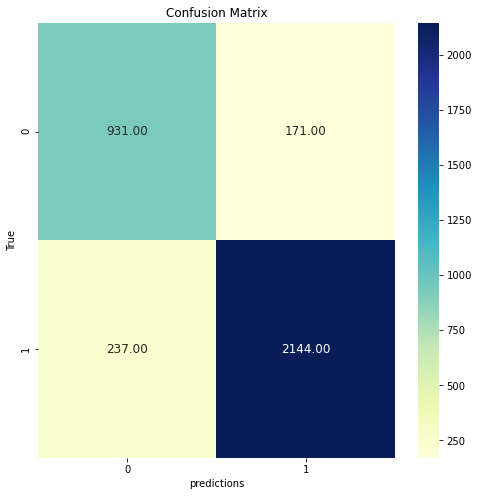

In [398]:
modeling(XGBClassifier());